## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   3.129942  1451.366788  0.975008  7.320095  1.688404
1  11.503555   144.715501  0.657471  6.524414  1.497371
2  93.194703  1643.944311  0.326156  5.734251  1.331051
3  39.649426   738.559011  0.224049  3.026284  1.315304
4  71.822967   530.844578  0.041016  8.043718  0.403128


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.09748 | train_mse: 4.42637 | train_mae: 1.72273 |  0:00:00s
epoch 1  | loss: 0.53969 | train_mse: 3.52448 | train_mae: 1.36014 |  0:00:00s
epoch 2  | loss: 0.53447 | train_mse: 3.36582 | train_mae: 1.33887 |  0:00:00s


epoch 3  | loss: 0.54004 | train_mse: 2.38402 | train_mae: 1.14743 |  0:00:00s
epoch 4  | loss: 0.68366 | train_mse: 1.99637 | train_mae: 1.0497  |  0:00:00s


epoch 5  | loss: 0.52918 | train_mse: 1.45071 | train_mae: 0.91855 |  0:00:00s
epoch 6  | loss: 0.41276 | train_mse: 1.10564 | train_mae: 0.8055  |  0:00:00s
epoch 7  | loss: 0.39103 | train_mse: 2.86251 | train_mae: 1.11458 |  0:00:01s


epoch 8  | loss: 0.46262 | train_mse: 2.30308 | train_mae: 1.06267 |  0:00:01s
epoch 9  | loss: 0.35023 | train_mse: 1.82387 | train_mae: 1.00456 |  0:00:01s
epoch 10 | loss: 0.41201 | train_mse: 1.9808  | train_mae: 1.02082 |  0:00:01s
epoch 11 | loss: 0.30032 | train_mse: 1.3719  | train_mae: 0.87675 |  0:00:01s


epoch 12 | loss: 0.35769 | train_mse: 0.86062 | train_mae: 0.69839 |  0:00:01s
epoch 13 | loss: 0.38682 | train_mse: 0.66153 | train_mae: 0.61096 |  0:00:01s
epoch 14 | loss: 0.28942 | train_mse: 0.41583 | train_mae: 0.50524 |  0:00:01s


epoch 15 | loss: 0.22985 | train_mse: 0.40096 | train_mae: 0.50629 |  0:00:01s
epoch 16 | loss: 0.32621 | train_mse: 0.49753 | train_mae: 0.54319 |  0:00:01s
epoch 17 | loss: 0.28742 | train_mse: 0.35402 | train_mae: 0.47898 |  0:00:01s


epoch 18 | loss: 0.52662 | train_mse: 0.33691 | train_mae: 0.46299 |  0:00:01s
epoch 19 | loss: 0.1983  | train_mse: 0.28709 | train_mae: 0.41788 |  0:00:01s
epoch 20 | loss: 0.36335 | train_mse: 0.32808 | train_mae: 0.43241 |  0:00:01s


epoch 21 | loss: 0.25117 | train_mse: 0.3226  | train_mae: 0.42471 |  0:00:02s
epoch 22 | loss: 0.34896 | train_mse: 0.37801 | train_mae: 0.46878 |  0:00:02s
epoch 23 | loss: 0.46285 | train_mse: 0.47644 | train_mae: 0.51424 |  0:00:02s
epoch 24 | loss: 0.45944 | train_mse: 0.4194  | train_mae: 0.49477 |  0:00:02s


epoch 25 | loss: 0.47325 | train_mse: 0.29276 | train_mae: 0.41964 |  0:00:02s
epoch 26 | loss: 0.33799 | train_mse: 0.2475  | train_mae: 0.38629 |  0:00:02s
epoch 27 | loss: 0.50869 | train_mse: 0.25238 | train_mae: 0.39146 |  0:00:02s


epoch 28 | loss: 0.33726 | train_mse: 0.33862 | train_mae: 0.4039  |  0:00:02s
epoch 29 | loss: 0.37343 | train_mse: 0.35458 | train_mae: 0.40325 |  0:00:02s
epoch 30 | loss: 0.3621  | train_mse: 0.28517 | train_mae: 0.40817 |  0:00:02s


epoch 31 | loss: 0.24048 | train_mse: 0.22941 | train_mae: 0.3851  |  0:00:02s
epoch 32 | loss: 0.23232 | train_mse: 0.21526 | train_mae: 0.3614  |  0:00:02s
epoch 33 | loss: 0.3368  | train_mse: 0.21009 | train_mae: 0.37089 |  0:00:02s


epoch 34 | loss: 0.2692  | train_mse: 0.21867 | train_mae: 0.37305 |  0:00:02s
epoch 35 | loss: 0.26979 | train_mse: 0.29885 | train_mae: 0.40738 |  0:00:03s
epoch 36 | loss: 0.27177 | train_mse: 0.30996 | train_mae: 0.41616 |  0:00:03s
epoch 37 | loss: 0.39631 | train_mse: 0.27978 | train_mae: 0.41765 |  0:00:03s


epoch 38 | loss: 0.28436 | train_mse: 0.27067 | train_mae: 0.41905 |  0:00:03s
epoch 39 | loss: 0.1743  | train_mse: 0.19826 | train_mae: 0.36826 |  0:00:03s
epoch 40 | loss: 0.18696 | train_mse: 0.20948 | train_mae: 0.35861 |  0:00:03s
epoch 41 | loss: 0.22515 | train_mse: 0.29984 | train_mae: 0.38749 |  0:00:03s


epoch 42 | loss: 0.26082 | train_mse: 0.213   | train_mae: 0.35257 |  0:00:03s
epoch 43 | loss: 0.33088 | train_mse: 0.19906 | train_mae: 0.35233 |  0:00:03s
epoch 44 | loss: 0.25265 | train_mse: 0.19486 | train_mae: 0.35041 |  0:00:03s


epoch 45 | loss: 0.28305 | train_mse: 0.1663  | train_mae: 0.32892 |  0:00:03s
epoch 46 | loss: 0.21778 | train_mse: 0.1573  | train_mae: 0.32019 |  0:00:03s


epoch 47 | loss: 0.24682 | train_mse: 0.15739 | train_mae: 0.32074 |  0:00:03s
epoch 48 | loss: 0.17579 | train_mse: 0.20162 | train_mae: 0.35176 |  0:00:04s
epoch 49 | loss: 0.42851 | train_mse: 0.22717 | train_mae: 0.37208 |  0:00:04s


epoch 50 | loss: 0.32384 | train_mse: 0.25343 | train_mae: 0.39517 |  0:00:04s
epoch 51 | loss: 0.25647 | train_mse: 0.16308 | train_mae: 0.32806 |  0:00:04s
epoch 52 | loss: 0.22289 | train_mse: 0.1577  | train_mae: 0.31395 |  0:00:04s


epoch 53 | loss: 0.38273 | train_mse: 0.18322 | train_mae: 0.32567 |  0:00:04s
epoch 54 | loss: 0.2198  | train_mse: 0.14498 | train_mae: 0.29544 |  0:00:04s
epoch 55 | loss: 0.17925 | train_mse: 0.14797 | train_mae: 0.30852 |  0:00:04s


epoch 56 | loss: 0.21034 | train_mse: 0.15943 | train_mae: 0.31685 |  0:00:04s
epoch 57 | loss: 0.32659 | train_mse: 0.12046 | train_mae: 0.28085 |  0:00:04s


epoch 58 | loss: 0.18705 | train_mse: 0.11082 | train_mae: 0.26531 |  0:00:04s
epoch 59 | loss: 0.23936 | train_mse: 0.1244  | train_mae: 0.27383 |  0:00:04s


epoch 60 | loss: 0.18196 | train_mse: 0.133   | train_mae: 0.28593 |  0:00:05s
epoch 61 | loss: 0.20371 | train_mse: 0.13103 | train_mae: 0.28362 |  0:00:05s
epoch 62 | loss: 0.2096  | train_mse: 0.13562 | train_mae: 0.2865  |  0:00:05s
epoch 63 | loss: 0.24614 | train_mse: 0.13194 | train_mae: 0.28834 |  0:00:05s


epoch 64 | loss: 0.20395 | train_mse: 0.12526 | train_mae: 0.28297 |  0:00:05s
epoch 65 | loss: 0.31809 | train_mse: 0.12598 | train_mae: 0.28799 |  0:00:05s
epoch 66 | loss: 0.35851 | train_mse: 0.17855 | train_mae: 0.35396 |  0:00:05s
epoch 67 | loss: 0.18592 | train_mse: 0.14591 | train_mae: 0.31405 |  0:00:05s


epoch 68 | loss: 0.22475 | train_mse: 0.15566 | train_mae: 0.30787 |  0:00:05s
epoch 69 | loss: 0.20667 | train_mse: 0.19457 | train_mae: 0.31468 |  0:00:05s
epoch 70 | loss: 0.18023 | train_mse: 0.16674 | train_mae: 0.31582 |  0:00:05s


epoch 71 | loss: 0.17699 | train_mse: 0.14916 | train_mae: 0.30829 |  0:00:05s
epoch 72 | loss: 0.27193 | train_mse: 0.17037 | train_mae: 0.33373 |  0:00:05s
epoch 73 | loss: 0.16709 | train_mse: 0.13953 | train_mae: 0.30151 |  0:00:06s
epoch 74 | loss: 0.2884  | train_mse: 0.1179  | train_mae: 0.27103 |  0:00:06s


epoch 75 | loss: 0.1499  | train_mse: 0.10796 | train_mae: 0.25584 |  0:00:06s
epoch 76 | loss: 0.22182 | train_mse: 0.10721 | train_mae: 0.26177 |  0:00:06s
epoch 77 | loss: 0.19393 | train_mse: 0.1314  | train_mae: 0.29681 |  0:00:06s
epoch 78 | loss: 0.33271 | train_mse: 0.15803 | train_mae: 0.32192 |  0:00:06s


epoch 79 | loss: 0.23114 | train_mse: 0.12732 | train_mae: 0.29306 |  0:00:06s
epoch 80 | loss: 0.13178 | train_mse: 0.14054 | train_mae: 0.30489 |  0:00:06s


epoch 81 | loss: 0.13886 | train_mse: 0.14818 | train_mae: 0.30982 |  0:00:06s
epoch 82 | loss: 0.26664 | train_mse: 0.15213 | train_mae: 0.30708 |  0:00:07s
epoch 83 | loss: 0.17947 | train_mse: 0.14139 | train_mae: 0.29341 |  0:00:07s


epoch 84 | loss: 0.19523 | train_mse: 0.14637 | train_mae: 0.30716 |  0:00:07s
epoch 85 | loss: 0.26015 | train_mse: 0.16751 | train_mae: 0.3321  |  0:00:07s
epoch 86 | loss: 0.1585  | train_mse: 0.17848 | train_mae: 0.34027 |  0:00:07s


epoch 87 | loss: 0.27618 | train_mse: 0.17263 | train_mae: 0.32697 |  0:00:07s
epoch 88 | loss: 0.22273 | train_mse: 0.15813 | train_mae: 0.30584 |  0:00:07s
epoch 89 | loss: 0.24416 | train_mse: 0.16799 | train_mae: 0.31573 |  0:00:07s
epoch 90 | loss: 0.16257 | train_mse: 0.16201 | train_mae: 0.30784 |  0:00:07s


epoch 91 | loss: 0.29465 | train_mse: 0.1649  | train_mae: 0.32252 |  0:00:07s
epoch 92 | loss: 0.19968 | train_mse: 0.17151 | train_mae: 0.33007 |  0:00:07s
epoch 93 | loss: 0.21247 | train_mse: 0.14594 | train_mae: 0.29414 |  0:00:07s


epoch 94 | loss: 0.18526 | train_mse: 0.13967 | train_mae: 0.28891 |  0:00:07s
epoch 95 | loss: 0.20621 | train_mse: 0.12785 | train_mae: 0.28906 |  0:00:07s
epoch 96 | loss: 0.15314 | train_mse: 0.12179 | train_mae: 0.27555 |  0:00:07s
epoch 97 | loss: 0.23961 | train_mse: 0.12198 | train_mae: 0.27295 |  0:00:08s


epoch 98 | loss: 0.28598 | train_mse: 0.13387 | train_mae: 0.28278 |  0:00:08s
epoch 99 | loss: 0.17797 | train_mse: 0.13025 | train_mae: 0.28393 |  0:00:08s
epoch 100| loss: 0.15804 | train_mse: 0.12703 | train_mae: 0.2811  |  0:00:08s
epoch 101| loss: 0.13508 | train_mse: 0.1137  | train_mae: 0.26396 |  0:00:08s


epoch 102| loss: 0.26064 | train_mse: 0.11649 | train_mae: 0.27083 |  0:00:08s
epoch 103| loss: 0.17274 | train_mse: 0.12817 | train_mae: 0.28486 |  0:00:08s
epoch 104| loss: 0.19992 | train_mse: 0.16235 | train_mae: 0.31799 |  0:00:08s
epoch 105| loss: 0.25883 | train_mse: 0.1731  | train_mae: 0.32181 |  0:00:08s


epoch 106| loss: 0.18564 | train_mse: 0.15753 | train_mae: 0.30293 |  0:00:08s
epoch 107| loss: 0.30141 | train_mse: 0.13536 | train_mae: 0.29545 |  0:00:08s
epoch 108| loss: 0.2067  | train_mse: 0.13193 | train_mae: 0.29613 |  0:00:08s


epoch 109| loss: 0.14602 | train_mse: 0.13628 | train_mae: 0.3038  |  0:00:08s
epoch 110| loss: 0.1822  | train_mse: 0.12494 | train_mae: 0.29362 |  0:00:08s
epoch 111| loss: 0.17083 | train_mse: 0.12207 | train_mae: 0.29211 |  0:00:08s
epoch 112| loss: 0.19891 | train_mse: 0.11661 | train_mae: 0.28738 |  0:00:09s


epoch 113| loss: 0.25505 | train_mse: 0.1223  | train_mae: 0.28872 |  0:00:09s
epoch 114| loss: 0.13686 | train_mse: 0.1252  | train_mae: 0.29247 |  0:00:09s
epoch 115| loss: 0.1719  | train_mse: 0.1264  | train_mae: 0.28918 |  0:00:09s
epoch 116| loss: 0.19053 | train_mse: 0.1648  | train_mae: 0.31882 |  0:00:09s


epoch 117| loss: 0.23119 | train_mse: 0.15006 | train_mae: 0.30787 |  0:00:09s
epoch 118| loss: 0.18573 | train_mse: 0.12608 | train_mae: 0.28646 |  0:00:09s
epoch 119| loss: 0.13846 | train_mse: 0.13174 | train_mae: 0.29117 |  0:00:09s
epoch 120| loss: 0.13824 | train_mse: 0.13968 | train_mae: 0.29575 |  0:00:09s


epoch 121| loss: 0.18176 | train_mse: 0.12507 | train_mae: 0.28883 |  0:00:09s
epoch 122| loss: 0.33896 | train_mse: 0.11823 | train_mae: 0.28306 |  0:00:09s
epoch 123| loss: 0.25938 | train_mse: 0.10393 | train_mae: 0.26465 |  0:00:09s


epoch 124| loss: 0.12385 | train_mse: 0.10983 | train_mae: 0.26621 |  0:00:09s
epoch 125| loss: 0.16225 | train_mse: 0.1262  | train_mae: 0.2812  |  0:00:09s

Early stopping occurred at epoch 125 with best_epoch = 75 and best_train_mae = 0.25584
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

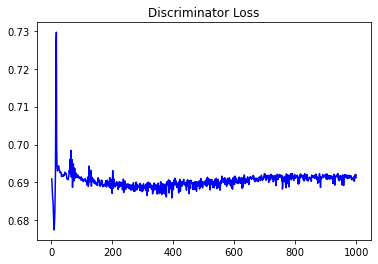

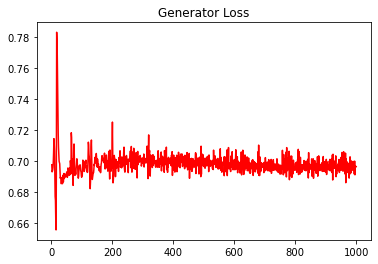

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4287715149866126


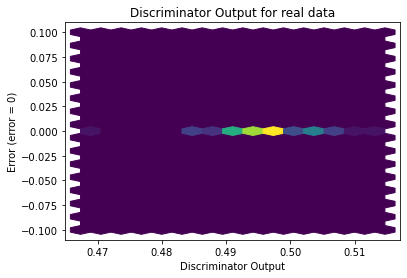

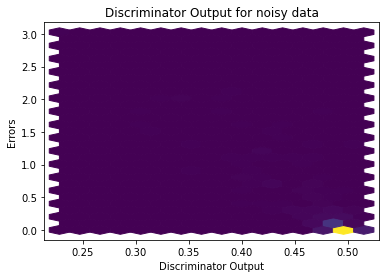

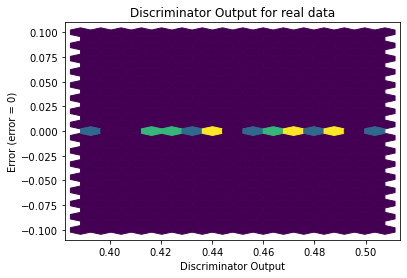

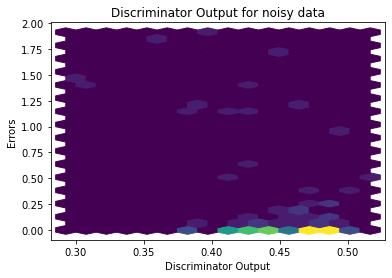

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


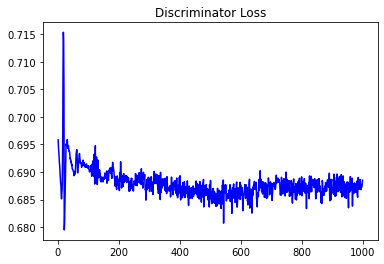

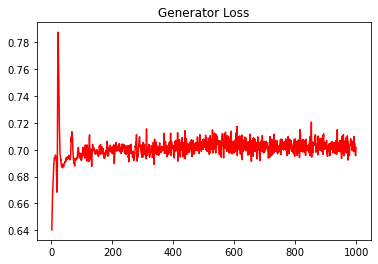

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.43912157688467546


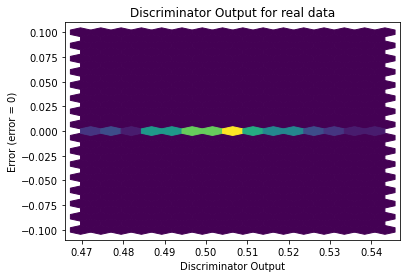

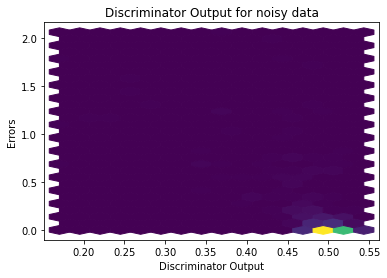

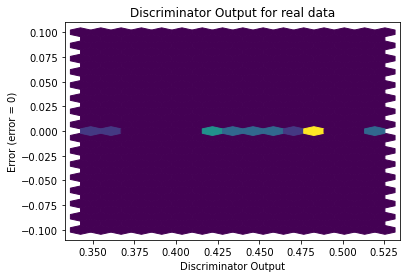

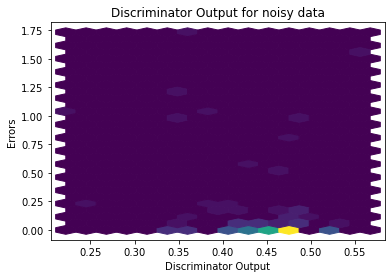

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6049]], requires_grad=True)
